In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

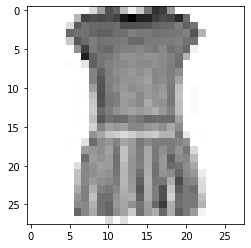

3


In [101]:
data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()
plt.imshow(train_images[3], cmap = plt.cm.binary)
plt.show()
print(train_labels[3])

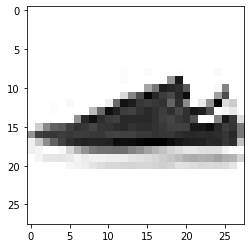

Sneaker
(28, 28)


In [106]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(train_images[6], cmap = plt.cm.binary)
plt.show()
print(class_names[train_labels[6]])
print(train_images[6].shape)

In [107]:
model = keras.Sequential([
	keras.layers.Flatten(input_shape = (28, 28)),
	keras.layers.Dense(128, activation = "relu"),
	keras.layers.Dense(10, activation = "softmax")
])
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [108]:
model.fit(train_images, train_labels, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 162us/sample - loss: 3.5257 - accuracy: 0.7052
Epoch 2/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.6553 - accuracy: 0.7779
Epoch 3/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.5519 - accuracy: 0.8148
Epoch 4/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.5120 - accuracy: 0.8274
Epoch 5/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.4884 - accuracy: 0.8354
Epoch 6/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.4748 - accuracy: 0.8395
Epoch 7/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.4678 - accuracy: 0.8447
Epoch 8/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.4691 - accuracy: 0.8432
Epoch 9/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.4591 - accuracy: 0.8470
Epoch

In [109]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Tested Acc: ", test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Tested Acc:  0.8375


In [110]:
model.save("image_classification_model.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: image_classification_model.model\assets


In [111]:
new_model = tf.keras.models.load_model("image_classification_model.model")

10000
<class 'numpy.ndarray'>
[0.0000000e+00 6.0964465e-26 0.0000000e+00 5.6066439e-30 0.0000000e+00
 3.5299016e-03 0.0000000e+00 1.7833704e-01 7.0616391e-14 8.1813306e-01]
[9 2 1 ... 8 1 5]
Ankle boot


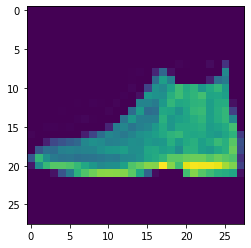

In [118]:
predictions = model.predict([test_images])
print(len(predictions))
print(type(predictions))
print(predictions[0])
prediction_numbers = np.argmax(predictions, axis = 1)
print(prediction_numbers)
print(class_names[prediction_numbers[0]])
plt.imshow(test_images[0])
plt.show()